In [5]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

iris_data = load_iris()
X, y = iris_data['data'], iris_data['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


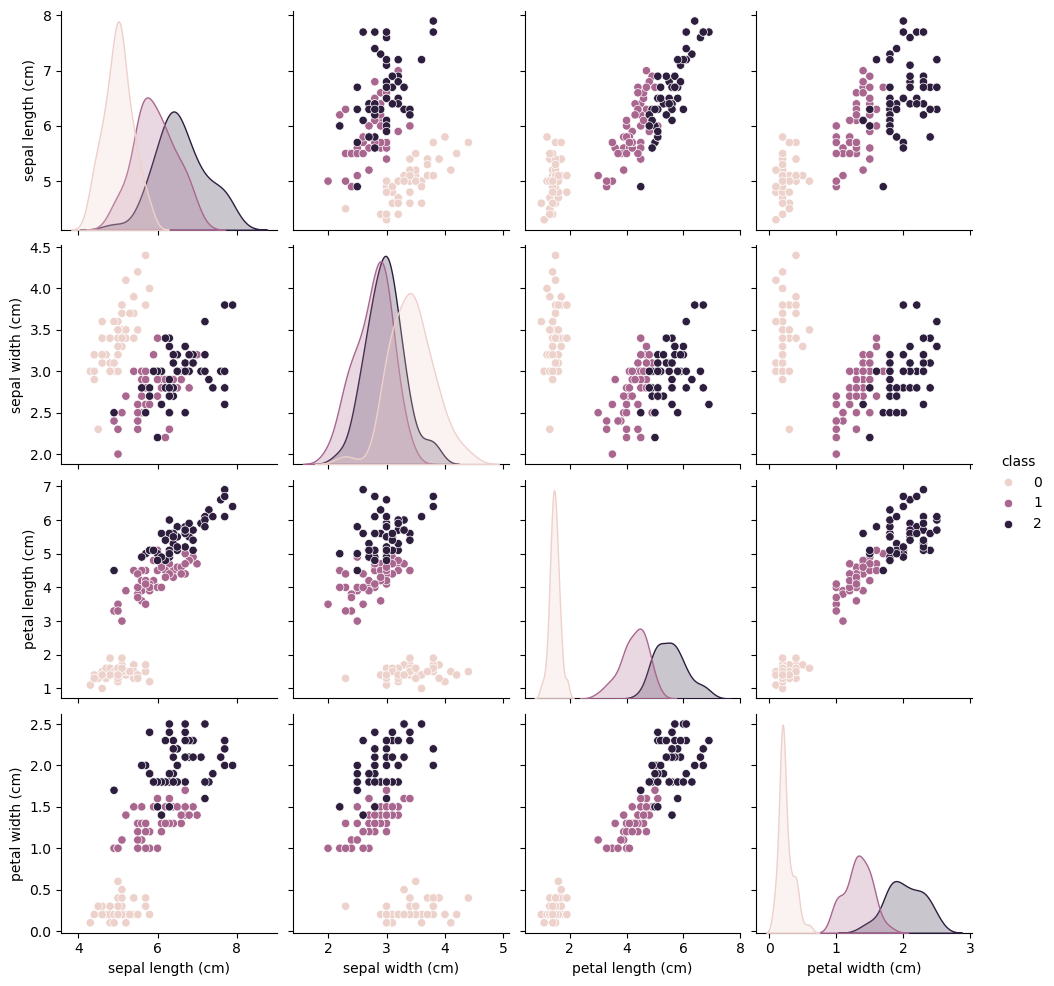

In [7]:
import seaborn as sns 
import pandas as pd
df = pd.DataFrame(X, columns=iris_data['feature_names'])
df['class'] = iris_data['target']
sns.pairplot(df, hue='class')

In [8]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # center the data
        self.mean = np.mean(X, axis=0)
        X = X - self.mean # now the mean is centered at 0

        # compute the covariance matrix
        cov = np.cov(X, rowvar=False)

        # compute the eigenvalues and eigenvectors of
        # the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # sort the eigenvalues and eigenvectors in decreasing order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Store the first n_components eigenvectors as the principal components
        self.components = eigenvectors[:, : self.n_components]

    def transform(self, X):
        # center the data
        X = X - self.mean

        # project the data onto the principal components
        X_transformed = np.dot(X, self.components)
        return X_transformed